# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** B

**Names:**

* Vincenzo Bazzucchi
* Amaury Combes
* Alexis Montavon

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import groupby
import numpy as np
from collections import Counter
%matplotlib inline

In [2]:
def read_edge_file(pathname):
    f = open(pathname, 'r')
    G = nx.Graph()
    for line in f:
        if line[0] == '#':
            continue
        line = f.readline().split(',')
        G.add_edge(int(line[0]) , int(line[1]))
    f.close()
    return G

In [3]:
G1 = read_edge_file('../data/network1.csv')

In [4]:
print("The network has", len(G1), "nodes", "and", G1.size(), "edges")

The network has 8419 nodes and 9292 edges


#### Exercise 2.2:  Node degree distribution

In [5]:
def compute_deg_dist(graph):
    degrees = nx.degree(graph)
    deg_distr = Counter()
    for deg in degrees.values():
        deg_distr[deg] += 1
    deg_distr = {k: (deg_distr[k] / len(degrees.keys())) for k in deg_distr.keys()}
    return deg_distr

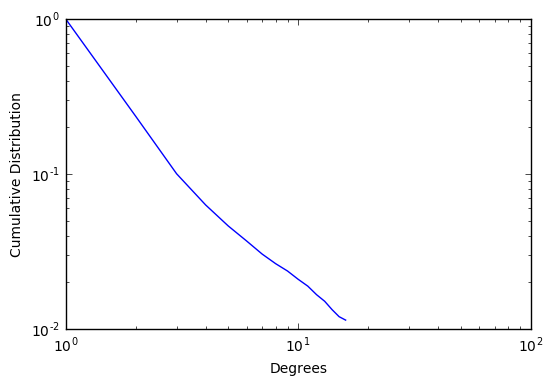

In [101]:
deg_distr = compute_deg_dist(G1)
N = 16
aggreg = np.zeros(N)

for i in range(1, N):
    aggreg[i] = deg_distr[i] + aggreg[i-1]
aggreg = 1-aggreg

fig, ax = plt.subplots()
x = list(deg_distr.keys())[:N]
y = aggreg
plt.loglog(x, y)
ax.xaxis.set_label_text("Degrees")
ax.yaxis.set_label_text("Cumulative Distribution")
plt.show()

An loglog plot is useful for ploting a complementary cumulative distribution function.

This distribution looks like a Power law as the curve is straight. We didn't plot further than degree 15 because the probability drop to 0.01%.

Here we tried to find the slope of the Power law by fitting a function into the data.

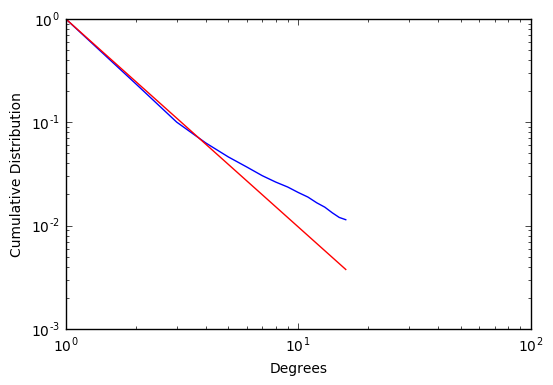

In [102]:
from scipy.optimize import curve_fit
def myExp(x, a):
    return np.power(x, -a)

popt, pcov = curve_fit(myExp, np.array(x[:N]), np.array(y[:N]))
fig, ax = plt.subplots()
ax.semilogy(x, y)
gen_data = np.power(x, -popt[0])
ax.loglog(x[:len(gen_data)],gen_data, color='r')
ax.xaxis.set_label_text("Degrees")
ax.yaxis.set_label_text("Cumulative Distribution")
plt.show()

#### Exercise 2.3: Giant component

Amount of connected components: 480
Ten biggest connected components ordered by size [7077, 20, 19, 16, 15, 13, 11, 10, 9, 9, 8, 8, 8, 8, 8, 8]


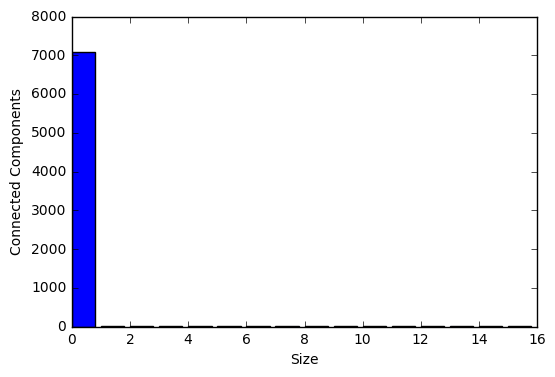

In [54]:
connected_components = sorted(nx.connected_component_subgraphs(G1), key=len, reverse=True)
num_of_connected_components = len(connected_components)
dimensions = [len(cc) for cc in connected_components]
print("Amount of connected components:", num_of_connected_components)
print("Ten biggest connected components ordered by size", dimensions[:N])

fig, ax = plt.subplots()
ax.bar(np.arange(len(dimensions[:N])),dimensions[:N])
ax.xaxis.set_label_text("Size")
ax.yaxis.set_label_text("Connected Components")
plt.show()

This plot represent the ten biggest connected components. We can easily see that there exists a giant component containing 7077 nodes, which represent $\approx$84.06% of the graph.

#### Exercise 2.4: Short paths & Small-worlds

In [55]:
# ATTENTION: Run only on cluster. SLOW
giant_component = connected_components[0]
path_lengths = nx.all_pairs_shortest_path_length(giant_component)
avg_shortest = nx.average_shortest_path_length(giant_component)

In [56]:
print("Average shortest path", avg_shortest)

Average shortest path 4.698255872793282


Network1 seems to be a small world, even smaller than what Duncan Watts exlpains as the average shortest path is $\approx$4.7 links in this graph.

In [57]:
def path_length_distribution(path_lengths):
    distribution = Counter()
    for dest in path_lengths.values():
        for dist in dest.values():
            distribution[dist] += 1
    return {k: distribution[k] / len(path_lengths) for k in distribution.keys()}

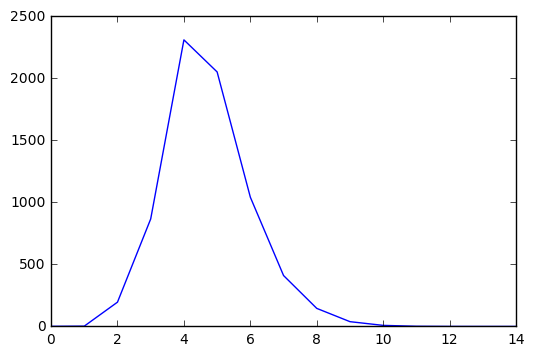

In [58]:
# x = distance, y = (number of couple of nodes at this distance / number of nodes)  Do we need division?
distribution = path_length_distribution(path_lengths)
plt.plot(list(distribution.keys()), list(distribution.values()))

Here is the plot of the distribution of the path lengths between any two node in the network.

#### Exercise 2.5: Network comparison

In [59]:
G2 = read_edge_file('../data/network2.csv')

In [60]:
print("The network has", len(G2), "nodes", "and", G2.size(), "edges")

The network has 24496 nodes and 21758 edges


6 6


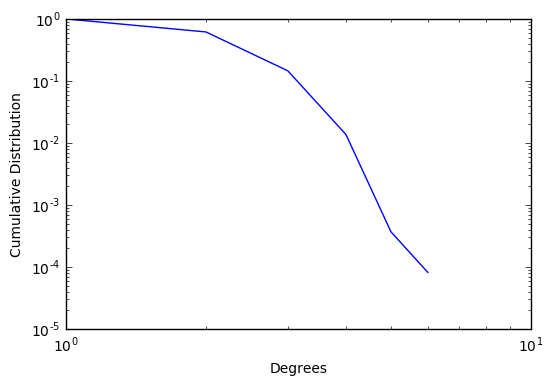

In [97]:
deg_distr = compute_deg_dist(G2)
N = max(deg_distr.keys())
aggreg = np.zeros(N)

for i in range(1, N):
    aggreg[i] = deg_distr.get(i, 0) + aggreg[i-1]
aggreg = 1-aggreg

fig, ax = plt.subplots()
x = list(deg_distr.keys())[:N]
y = aggreg
print(len(x), len(y))
plt.loglog(x, y)
ax.xaxis.set_label_text("Degrees")
ax.yaxis.set_label_text("Cumulative Distribution")
plt.show()

This looks like an expnential distribution

Repondre aux questions!

In [ ]:
fig, ax = plt.subplots()
ax.bar(x, y, color='r')
mu = mle_poisson(list(deg_distr.values()), 7)
gen_data = [poisson.pmf(x, mu, 1) for x in range(7)]
ax.bar(x[:len(gen_data)],gen_data, alpha=0.5)
ax.xaxis.set_label_text("Degrees")
ax.yaxis.set_label_text("Distribution")
plt.show()

Amount of connected components: 3355
Ten biggest connected components ordered by size [237, 219, 215, 194, 175, 136, 136, 123, 118, 112]


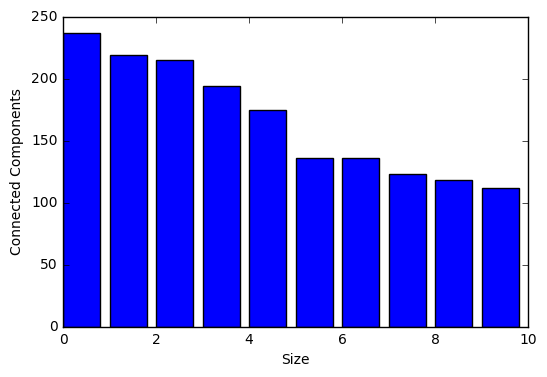

In [63]:
connected_components = sorted(nx.connected_component_subgraphs(G2), key=len, reverse=True)
num_of_connected_components = len(connected_components)
dimensions = [len(cc) for cc in connected_components]
print("Amount of connected components:", num_of_connected_components)
print("Ten biggest connected components ordered by size", dimensions[:N])

fig, ax = plt.subplots()
ax.bar(np.arange(len(dimensions[:N])),dimensions[:N])
ax.xaxis.set_label_text("Size")
ax.yaxis.set_label_text("Connected Components")
plt.show()

This graph represent the 10 biggest connected components. We see that in this second network, there is no giant component. Unlike network1 there are many more different connected components (3355) and their size is more similar. Therefore we can say that network2 is not a small-world, as the proportion of connected nodes is very small.

#### Exercise 2.6: Network identification

Clearly network1 is the subgraph of router comprising the Internet and network2 is the network of roads of New-York city. As seen in class one of the property of social network is to have a giant component and network1 has one. Another property about the connection between people, given by Duncan Watts, is that on average we are all connected by a path of length 6. Network1 has an average connection of 4.7 on his giant component (84% of the graph).
Although newtork1 is not a graph of people but routers, we can imagine them having the same properties as routers connect humans throughout the web.